<a href="https://colab.research.google.com/github/RafiKepecs/Bayesian-Machine-Learning/blob/main/Project%204%3A%20Guassian%20Processes/BayesML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Text(0.5, 1.0, 'Samples of Posterior Distribution, sigma = 0.2')]

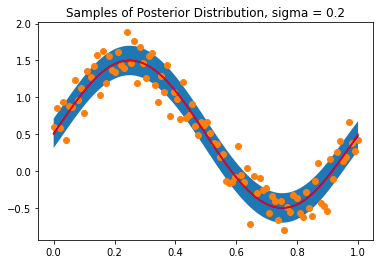

In [ ]:
#%% Project 4
import numpy as np
from matplotlib import pyplot as plt

#%% Function Definitions
def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

def k(X,X_prime):
    #6.23
    K = np.exp(-np.linalg.norm(X-X_prime)**2/(2*sigma**2))
    return K
#%% Parameters
n_points = 500 # number of points over which the original function is calculated
#Distribution parameters
beta = 25.0
alpha = 2.0

sigma = np.sqrt(1/beta)

#%% Original Sinusoid
X_space = np.linspace(0, 1, n_points).reshape(n_points,1)
t_true = 0.5 + np.sin(2 * np.pi * X_space)

#%% Generate sinusoidal observations with noise
n_obs = 20 # number of observations
X_obs = np.random.rand(n_obs, 1)
noise = np.random.normal(0, np.sqrt(1/beta), n_obs)
f_obs = 0.5 + np.sin(2 * np.pi * X_obs)
t = np.array([f_obs[i] + noise[i] for i in range(n_obs)])

#%% Test points on which to generate predictions
n_pred = 100
X_pred = np.linspace(0, 1, n_pred)#np.random.rand(n_pred, 1) #

#%% Covariance Matrix
Cn = np.zeros((len(X_space), len(X_space)))
for i in range(len(X_space)):
    for j in range(len(X_space)):
        Cn[i][j] = k(X_space[i],X_space[j])
Cn = Cn + (1/beta)*np.eye(n_points)
c = np.zeros((len(X_pred), len(X_pred)))
for i in range(len(X_pred)):
    for j in range(len(X_pred)):
        c[i][j] = k(X_pred[i],X_pred[j])
c = c + (1/beta)*np.eye(n_pred)

K = np.zeros((len(X_pred), len(X_space)))
for i in range(len(X_pred)):
    for j in range(len(X_space)):
        K[i][j] = k(X_pred[i],X_space[j])
K = K.T
top = np.concatenate((Cn, K), axis=1)

bottom = np.concatenate((K.T, c), axis=1)

C = np.concatenate((top, bottom), axis=0)

#%% m and S of the posterior distribution
# Equation 6.66
m = K.T @ np.linalg.inv(Cn) @ t_true
m = m.reshape(n_pred, 1)
# 6.67
s = c - K.T @ np.linalg.inv(Cn) @ K

#%% Plot
fig, ax = plt.subplots()

posterior = np.random.multivariate_normal(m.squeeze(), s)
# Plot function.
plt.plot(X_pred, m, color="blue");
plt.fill_between(X_pred, m.squeeze() + sigma, m.squeeze() - sigma)
plt.scatter(X_pred, posterior)
# Plot true function.
plt.plot(X_space.squeeze(), t_true.squeeze(), color='red')

ax.set(title=f'Samples of Posterior Distribution, sigma = {sigma}')